In [6]:
alt.renderers.enable('notebook')

In [7]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<h1 align='center'> Предсказательные инструменты машинного обучения при анализе данных обучения на онлайн-курсах </h1>



Никандров Алексей Андреевич

Научный руководитель: доктор педагогических наук, доцент Пиотровская Ксения Раймондовна

<div align="center">
    Каждые два года объём хранимой информации увеличивается ~ в два раза. 
    <img width=800px src="https://www.oreilly.com/radar/wp-content/uploads/sites/3/2019/06/Figure2-22-33e23549592a32d6c0e8cee505dfbcd1.jpg">
</div>

<div align="center">
    Стоит рассмотреть возможность использовать накопленные данные в образовании. Например, при обучении математике.
</div>

<div align="center">
    <strong>Актуальность</strong> темы настоящей магистерской диссертации определяется степенью необходимости отыскания корректного способа использования данных обучения на онлайн-курсах.
</div>

<div align="center">
    <strong>Объект</strong> исследования — данные обучения на онлайн-курсах.
</div>

<div align="center">
    <strong>Предметом</strong> исследования являются предсказательные инструменты как способ анализа данных обучения на онлайн-курсах.
</div>

<div align="center">
    Анализ данных обучения на онлайн-курсах для повышения уровня успеваемости обучающихся по математике есть <strong>цель</strong> данной работы.
</div>

<div align="center">
    <strong>Задачи исследования.</strong>
</div>

1. Дать определение основных понятий, связанных с предсказательными инструментами и анализом данных.

2. Описание возможных подходов к решению поставленной задачи.

3. Изучить потенциал языка программирования Python как инструмент анализа данных.

4. Проанализировать библиотеки языка Python для решения поставленной проблемы.

5. Предобработка собранных данных.

6. Анализ собранных данных.

7. Выдвижение критериев «успеха» при формулировании математических задач для нематематических направлений ВУЗов на основе проведенного эксперимента.

<h1 align="center">
    Использование решающих деревьев
</h1>

<div align="center">
Например, использование методов математики для особо результативного решения задач, возникающих в сфере экономики, с применением как правило, актуальных компьютерных технологий. В том числе задач, связанных с предсказанием потенциально положительного или отрицательного клиента.
</div>

<div align="center">
    <img width=800px src="https://i.vas3k.ru/7rd.jpg">
</div>

<div align="center">    
    <img width=800px src="https://lh3.googleusercontent.com/proxy/A3lS9UN_qsnNOjEyK0Ti9ZxZ4hKQ72YbOB2NCQDV_UYGDEvg8t4XVP8SRRwdkwXUdiUPdp3cTv0MeCbln7iLxTjA69YS">
</div>

<div align="center">    
    <img width=800px src="https://loginom.ru/sites/default/files/blogpost-files/activation-function.svg">
</div>

<div align="center">    
    <img width=800px src="https://cdn-images-1.medium.com/max/800/1*xLKdaL_RFhqFuy1iKSXvXA.png">
</div>

<div align="center">
Если в экономике подобные инструменты применяются уже не первый год, то почему бы в образовании на раннем этапе не определять
потенциально успешного или неуспешного студента? 
Точнее на основании признаков отдельной группы студентов определять потенциально сложные разделы дисциплины.
Тем самым заблаговременно вносить корректировки в учебный план для повышения общей успеваемости.
</div>

<div align="center">
В качестве базового примера можно рассмотреть всего лишь 3 столбца:
</div>

In [8]:
data = pd.DataFrame({'X_1': [1, 1, 1, 0, 0, 0, 0, 1], 'X_2': [0, 0, 0, 1, 0, 0, 0, 1], 'Y': [1, 1, 1, 1, 0, 0, 0, 0]})

<div align="center">    
    X_1, X_2 - два признака. На основании признаков присваивается класс Y.
</div>

In [9]:
data

,X_1,X_2,Y
0,1,0,1
1,1,0,1
2,1,0,1
3,0,1,1
4,0,0,0
5,0,0,0
6,0,0,0
7,1,1,0


In [15]:
# На основании 3 столбцов уже можно обучить дерево решений (модель для предсказаний)

clf = tree.DecisionTreeClassifier(criterion='entropy') # В переменную clf сохраним необученное дерево решений:

X = data[['X_1', 'X_2']] # Данные, которые используем для обучения
y = data.Y # То, что предсказываем

trained_tree = clf.fit(X, y) # Передаём признаки и целевую переменную

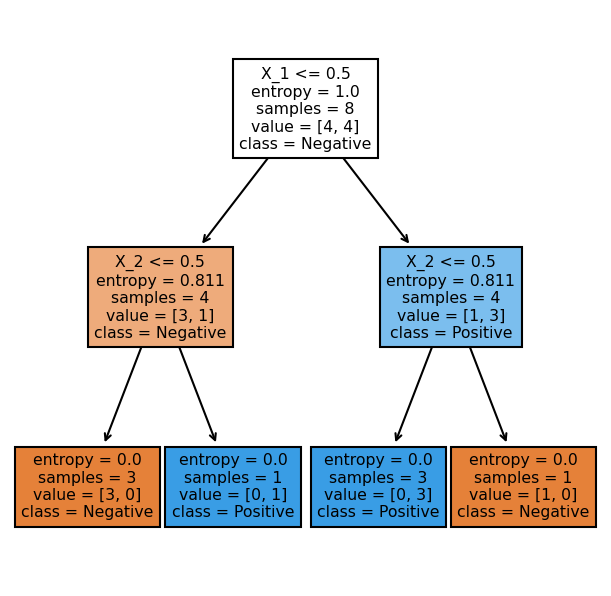

In [16]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=150)

tree.plot_tree(clf, feature_names=list(X),
               class_names=['Negative', 'Positive'],
               filled=True);

<div align="center">
    Получили обученное дерево решений.
    <img width=1000px src="https://melmagazine.com/wp-content/uploads/2019/07/Stonks_Meme.jpg">
</div>

И джини, и энтропия являются мерами "чистоты" узла. Узел, имеющий несколько классов, нечист, тогда как узел, имеющий только один класс, чист. Энтропия в статистике аналогична энтропии в термодинамике, где она означает беспорядок. Если в узле есть несколько классов, в этом узле есть беспорядок.

<em>Gini</em> = $1 - \sum^{n}_{i=1} p^2(c_i)$

<em>Entropy</em> = $\sum^{n}_{i=1} -p(c_i)\log_2(p(c_i))$

где $p(c_i)$ - вероятность/процент класса $c_i$ в вершине.

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=150)

tree.plot_tree(clf, feature_names=list(X),
               class_names=['Negative', 'Positive'],
               filled=True);

<div align="center">
У дерева решений есть свои недостатки. Основное из них - переобучение, 
выражающееся в попытке безошибочно разделить исходные данные. В таком случае дерево решений не находит закономерность,
которую можно использовать на новых данных. Бороться с этим можно разными способами. Например, ограничением глубины дерева.
Тогда тренировочные данные с бОльшим успехом могут позволить найти закономерность.
</div>

<div align="center">
На дереве решений всё не заканчивается. Существуют более продвинутые методы на их основе. Одним из таких является <strong>случайный лес</strong> конца 90-х - начала 2000-х. Если коротко, то случайный лес работает по принципу парламента. 
В таком случае данные не передаются одному дереву решений, а распределяются между множеством деревьев решений.
При чём распределение может происходить в случайной пропорции (от этого и название), 
то есть одно дерево решений может получить 1, 4, 5 признаки и 100 первых наблюдений, а второе - 5, 6, 8 признаки и 200 последних наблюдений (при распределении возможны пересечения). В итоге каждое из деревьев выносит свой приговор. На основании большинства происходит окончательное решение.
</div>

<div align="center">
    В моём случае были собраны, предобработаны и проанализированы данные более 100 студентов (58 за 2019-2020 года и 56 за 2020-2021) одного из онлайн-курсов РГПУ им. А. И. Герцена. Данные включали в себя: 
</div>
<ul>
    <li>&nbsp; баллы за ЕГЭ по 3-м предметам</li>
    <li>&nbsp; результаты заданий контрольной работы</li>
</ul>
<div align="center">
    При использовании предсказательных инструментов задействованы лишь первые 58, так как первые учились очно, а вторые - уже дистанцинционно, поэтому смешивать их некорректно. Тем более в дистанционном формате результаты по контрольной работе менее справедливы, поэтому группа из 56 человек не была рассмотрена детально.
</div>

<div align="center">
    Метрики качества при обученном дереве решений оказались существенно ниже, чем при обученном случайном лесе. В этом можно более подробно убедиться, если посмотреть материалы диссертации. Также выявленная закономерность требует большего количества студентов, чтобы убедиться в корректности предположения.
<div align="center">

<h1 align='center'> Спасибо за внимание! </h1>